In [1]:
import numpy as np
from numpy import linalg as la
# import fcwt
# from scipy.integrate import simps
# from scipy.interpolate import CubicSpline
# from scipy.signal import savgol_filter, argrelmax, find_peaks_cwt, find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
# %matplotlib widget

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'\usepackage{amssymb}\usepackage{amsmath}\usepackage{bm}\usepackage{physics}', # insert packages here e.g. r'\usepackage{mathrm}'
    "font.family": "serif",
    "font.serif": "cm",
    "font.size": 9, # 10 for normal figs, 13.5 for paper panel
    "legend.fontsize": 8 # 9 for normal figs, 11.5, for paper panel
})
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)

textsize = 9

figwidth_latex_pt = 246.0
figwidth_2col_latex_pt = 246.0
inches_per_pt = 1.0/72.27
golden = (np.sqrt(5)-1.0)/2.0
figwidth = figwidth_latex_pt*inches_per_pt
figheight = figwidth*golden
figwidth_2col = figwidth_latex_pt*inches_per_pt
figheight_2col = figwidth_2col*golden
figsize = (figwidth, figheight)
figsize_mod = (figwidth, figheight*1.07)
figsize_2col = (figwidth_2col, figheight_2col)
figsize_map = (figwidth, figwidth)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [92]:
# Import files - quantum
data_n4_q = np.genfromtxt('../data/lasso_regression_n4.csv', delimiter=',')
data_n6_q = np.genfromtxt('../data/lasso_regression_n6.csv', delimiter=',')
data_n8_q = np.genfromtxt('../data/lasso_regression_n8.csv', delimiter=',')
data_n4_q_param_unitary = np.genfromtxt('../data/forr_ovlap_model_n4_increase_setsize.csv', delimiter=',')

# Import files from npz - classical
data_n4_cl = np.load('../data/forr_siamese_nn_n4.npz')["results"]
data_n6_cl = np.load('../data/forr_siamese_nn_n6.npz')["results"]
data_n8_cl = np.load('../data/forr_siamese_nn_n8.npz')["results"]

# Import files from npz - classical with dropout
data_n4_cl_dropout = np.load('../data/forr_siamese_nn_dropout_n4.npz')["results"]
data_n6_cl_dropout = np.load('../data/forr_siamese_nn_dropout_n6.npz')["results"]
data_n8_cl_dropout = np.load('../data/forr_siamese_nn_dropout_n8.npz')["results"]

# Columns: train loss (mean, std),
#          test loss (mean, std),
#          train acc (mean, std),
#          test acc (mean, std)

col1 = 'C0' # '#1A839E'
col2 = 'C1' # '#FF9000'
col3 = 'C2' # '#6A994E'
col4 = 'C3' # '#6A994E'

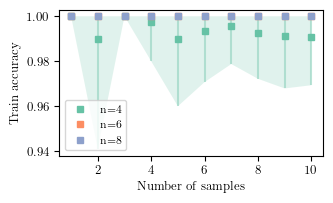

In [98]:
# Columns: train loss (mean, std), 0, 1
#          test loss (mean, std), 2, 3
#          train acc (mean, std), 4, 5
#          test acc (mean, std) 6, 7

def plot_data_type(what, idx):
    fig, ax = plt.subplots(figsize=(figwidth, figheight))

    xx = [i for i in range(1, 11)]

    # Select the data based on the input string
    data_n4 = globals()[f'data_n4_{what}']
    data_n6 = globals()[f'data_n6_{what}']
    data_n8 = globals()[f'data_n8_{what}']

    # Calculate the upper errors
    if idx==4 or idx==6:
        upper_data_n4_error = np.minimum(data_n4[:, idx+1], 1 - data_n4[:, idx])
        upper_data_n6_error = np.minimum(data_n6[:, idx+1], 1 - data_n6[:, idx])
        upper_data_n8_error = np.minimum(data_n8[:, idx+1], 1 - data_n8[:, idx])
    else:
        upper_data_n4_error = data_n4[:, idx+1]
        upper_data_n6_error = data_n6[:, idx+1]
        upper_data_n8_error = data_n8[:, idx+1]

    # Plot error bars
    ax.errorbar(xx, data_n4[:, idx], yerr=[data_n4[:, idx+1], upper_data_n4_error], fmt='none', elinewidth=1.5, ecolor=col1, alpha=0.4)
    ax.errorbar(xx, data_n6[:, idx], yerr=[data_n6[:, idx+1], upper_data_n6_error], fmt='none', elinewidth=1.5, ecolor=col2, alpha=0.4)
    ax.errorbar(xx, data_n8[:, idx], yerr=[data_n8[:, idx+1], upper_data_n8_error], fmt='none', elinewidth=1.5, ecolor=col3, alpha=0.4)

    # Plot markers
    ax.plot(xx, data_n4[:, idx], 's', markersize=5, markerfacecolor=col1, markeredgecolor=col1, alpha=1, label=f'n=4')
    ax.plot(xx, data_n6[:, idx], 's', markersize=5, markerfacecolor=col2, markeredgecolor=col2, alpha=1, label=f'n=6')
    ax.plot(xx, data_n8[:, idx], 's', markersize=5, markerfacecolor=col3, markeredgecolor=col3, alpha=1, label=f'n=8')

    # Fill between
    ax.fill_between(xx, data_n4[:, idx] - data_n4[:, idx+1], data_n4[:, idx] + upper_data_n4_error, color=col1, alpha=0.2, edgecolor='none')
    ax.fill_between(xx, data_n6[:, idx] - data_n6[:, idx+1], data_n6[:, idx] + upper_data_n6_error, color=col2, alpha=0.2, edgecolor='none')
    ax.fill_between(xx, data_n8[:, idx] - data_n8[:, idx+1], data_n8[:, idx] + upper_data_n8_error, color=col3, alpha=0.2, edgecolor='none')

    ax.set_xlabel('Number of samples')
    match idx:
        case 0:
            ax.set_ylabel('Train loss')
        case 2:
            ax.set_ylabel('Test loss')
        case 4:
            ax.set_ylabel('Train accuracy')
        case 6:
            ax.set_ylabel('Test accuracy')

    ax.legend()
    # ax.legend(loc='lower right')

    if idx == 0 or idx == 2:
        ax.set_yscale('log')
        # ax.set_ylim(1e-15, 1)

    plt.tight_layout()

    match idx:
        case 0:
            plt.savefig(f'../data/paper_trainlossVSsamples_{what}.pdf')
        case 2:
            plt.savefig(f'../data/paper_testlossVSsamples_{what}.pdf')
        case 4:
            plt.savefig(f'../data/paper_trainaccVSsamples_{what}.pdf')
        case 6:
            plt.savefig(f'../data/paper_testaccVSsamples_{what}.pdf')

# Call the function with the desired string
plot_data_type('cl_dropout', 4)

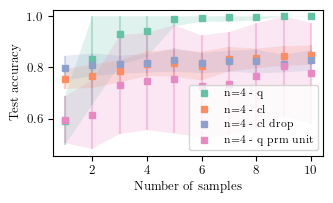

In [107]:
# Columns: train loss (mean, std), 0, 1
#          test loss (mean, std), 2, 3
#          train acc (mean, std), 4, 5
#          test acc (mean, std) 6, 7

def plot_data(n, idx):
    fig, ax = plt.subplots(figsize=(figwidth, figheight))

    col1 = 'C0' # '#1A839E'
    col2 = 'C1' # '#FF9000'
    col3 = 'C2' # '#6A994E'
    col4 = 'C3' # '#6A994E'

    xx = [i for i in range(1, 11)]

    # Select the data based on the input string
    data_q = globals()[f'data_n{n}_q']
    data_cl = globals()[f'data_n{n}_cl']
    data_cl_dropout = globals()[f'data_n{n}_cl_dropout']

    if n == '4':
        data_q_param_unitary = globals()[f'data_n4_q_param_unitary']
            # Calculate the upper errors
        if idx==4 or idx==6:
            upper_data_q_error = np.minimum(data_q[:, idx+1], 1 - data_q[:, idx])
            upper_data_q_param_unitary_error = np.minimum(data_q_param_unitary[:, idx+1], 1 - data_q_param_unitary[:, idx])
            upper_data_cl_error = np.minimum(data_cl[:, idx+1], 1 - data_cl[:, idx])
            upper_data_cl_dropout_error = np.minimum(data_cl_dropout[:, idx+1], 1 - data_cl_dropout[:, idx])
        else:
            upper_data_q_error = data_q[:, idx+1]
            upper_data_q_param_unitary_error = data_q_param_unitary[:, idx+1]
            upper_data_cl_error = data_cl[:, idx+1]
            upper_data_cl_dropout_error = data_cl_dropout[:, idx+1]

        # Plot error bars
        ax.errorbar(xx, data_q[:, idx], yerr=[data_q[:, idx+1], upper_data_q_error], fmt='none', elinewidth=1.5, ecolor=col1, alpha=0.4)
        ax.errorbar(xx, data_cl[:, idx], yerr=[data_cl[:, idx+1], upper_data_cl_error], fmt='none', elinewidth=1.5, ecolor=col2, alpha=0.4)
        ax.errorbar(xx, data_cl_dropout[:, idx], yerr=[data_cl_dropout[:, idx+1], upper_data_cl_dropout_error], fmt='none', elinewidth=1.5, ecolor=col3, alpha=0.4)
        ax.errorbar(xx, data_q_param_unitary[:, idx], yerr=[data_q_param_unitary[:, idx+1], upper_data_q_param_unitary_error], fmt='none', elinewidth=1.5, ecolor=col4, alpha=0.4)

        # Plot markers
        ax.plot(xx, data_q[:, idx], 's', markersize=5, markerfacecolor=col1, markeredgecolor=col1, alpha=1, label=f'n={n} - q')
        ax.plot(xx, data_cl[:, idx], 's', markersize=5, markerfacecolor=col2, markeredgecolor=col2, alpha=1, label=f'n={n} - cl')
        ax.plot(xx, data_cl_dropout[:, idx], 's', markersize=5, markerfacecolor=col3, markeredgecolor=col3, alpha=1, label=f'n={n} - cl drop')
        ax.plot(xx, data_q_param_unitary[:, idx], 's', markersize=5, markerfacecolor=col4, markeredgecolor=col4, alpha=1, label=f'n={n} - q prm unit')

        # Fill between
        ax.fill_between(xx, data_q[:, idx] - data_q[:, idx+1], data_q[:, idx] + upper_data_q_error, color=col1, alpha=0.2, edgecolor='none')
        ax.fill_between(xx, data_cl[:, idx] - data_cl[:, idx+1], data_cl[:, idx] + upper_data_cl_error, color=col2, alpha=0.2, edgecolor='none')
        ax.fill_between(xx, data_cl_dropout[:, idx] - data_cl_dropout[:, idx+1], data_cl_dropout[:, idx] + upper_data_cl_dropout_error, color=col3, alpha=0.2, edgecolor='none')
        ax.fill_between(xx, data_q_param_unitary[:, idx] - data_q_param_unitary[:, idx+1], data_q_param_unitary[:, idx] + upper_data_q_param_unitary_error, color=col4, alpha=0.2, edgecolor='none')
    else:
        # Calculate the upper errors
        if idx==4 or idx==6:
            upper_data_q_error = np.minimum(data_q[:, idx+1], 1 - data_q[:, idx])
            upper_data_cl_error = np.minimum(data_cl[:, idx+1], 1 - data_cl[:, idx])
            upper_data_cl_dropout_error = np.minimum(data_cl_dropout[:, idx+1], 1 - data_cl_dropout[:, idx])
        else:
            upper_data_q_error = data_q[:, idx+1]
            upper_data_cl_error = data_cl[:, idx+1]
            upper_data_cl_dropout_error = data_cl_dropout[:, idx+1]

        # Plot error bars
        ax.errorbar(xx, data_q[:, idx], yerr=[data_q[:, idx+1], upper_data_q_error], fmt='none', elinewidth=1.5, ecolor=col1, alpha=0.4)
        ax.errorbar(xx, data_cl[:, idx], yerr=[data_cl[:, idx+1], upper_data_cl_error], fmt='none', elinewidth=1.5, ecolor=col2, alpha=0.4)
        ax.errorbar(xx, data_cl_dropout[:, idx], yerr=[data_cl_dropout[:, idx+1], upper_data_cl_dropout_error], fmt='none', elinewidth=1.5, ecolor=col3, alpha=0.4)

        # Plot markers
        ax.plot(xx, data_q[:, idx], 's', markersize=5, markerfacecolor=col1, markeredgecolor=col1, alpha=1, label=f'n={n} - q')
        ax.plot(xx, data_cl[:, idx], 's', markersize=5, markerfacecolor=col2, markeredgecolor=col2, alpha=1, label=f'n={n} - cl')
        ax.plot(xx, data_cl_dropout[:, idx], 's', markersize=5, markerfacecolor=col3, markeredgecolor=col3, alpha=1, label=f'n={n} - cl drop')

        # Fill between
        ax.fill_between(xx, data_q[:, idx] - data_q[:, idx+1], data_q[:, idx] + upper_data_q_error, color=col1, alpha=0.2, edgecolor='none')
        ax.fill_between(xx, data_cl[:, idx] - data_cl[:, idx+1], data_cl[:, idx] + upper_data_cl_error, color=col2, alpha=0.2, edgecolor='none')
        ax.fill_between(xx, data_cl_dropout[:, idx] - data_cl_dropout[:, idx+1], data_cl_dropout[:, idx] + upper_data_cl_dropout_error, color=col3, alpha=0.2, edgecolor='none')

    ax.set_xlabel('Number of samples')
    match idx:
        case 0:
            ax.set_ylabel('Train loss')
        case 2:
            ax.set_ylabel('Test loss')
        case 4:
            ax.set_ylabel('Train accuracy')
        case 6:
            ax.set_ylabel('Test accuracy')

    ax.legend()
    # ax.legend(loc='lower right')

    if idx == 0 or idx == 2:
        ax.set_yscale('log')

    plt.tight_layout()

    # match idx:
    #     case 0:
    #         plt.savefig(f'../data/paper_trainlossVSsamples_n{n}.pdf')
    #     case 2:
    #         plt.savefig(f'../data/paper_testlossVSsamples_n{n}.pdf')
    #     case 4:
    #         plt.savefig(f'../data/paper_trainaccVSsamples_n{n}.pdf')
    #     case 6:
    #         plt.savefig(f'../data/paper_testaccVSsamples_n{n}.pdf')

# Call the function with the desired string
plot_data('4', 6)